<h1 align="center">Images</h1>

<table width="100%">
<tr style="background-color: red;"><td><font color="white">SimpleITK conventions:</font></td></tr>
<tr><td>
<ul>
<li>Image access is in x,y,z order, image.GetPixel(x,y,z) or image[x,y,z], with zero based indexing.</li>
<li>If the output of an ITK filter has non-zero starting index, then the index will be set to 0, and the origin adjusted accordingly.</li>
</ul>
</td></tr>
</table>

SimpleITK（源自ITK）作为图像处理和分析工具包的独特功能是将图像视为占据物理空间中有界区域的物理对象。 另外，图像沿每个轴的像素之间可以具有不同的间隔，并且轴不一定是正交的。 下图说明了这些概念。

<img src="ImageOriginAndSpacing.png" style="width:700px"/><br><br>


### Pixel Types

像素类型表示为枚举类型。 以下是枚举列表的表。

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

还有sitkUnknown，用于未定义或错误的像素ID。 它的值为-1。 

并非所有发行版都提供64位整数类型。 如果不可用，则值为sitkUnknown。

In [2]:
from __future__ import print_function

import SimpleITK as sitk

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, fixed
import os

OUTPUT_DIR = 'Output'

# Utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data).
%run update_path_to_download_script
from downloaddata import fetch_data as fdata

## Load your first image and display it

Fetching SimpleITK.jpg


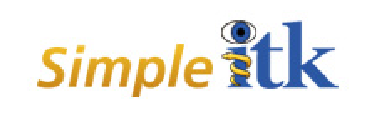

In [3]:
logo = sitk.ReadImage(fdata('SimpleITK.jpg'))

plt.imshow(sitk.GetArrayViewFromImage(logo))

#不显示坐标轴
plt.axis('off');

## Image Construction

有多种方法可以创建图像。 

完整定义图像需要以下组件：
<ol>
<li>Pixel type(像素类型) [fixed on creation, no default]: unsigned 32 bit integer, sitkVectorUInt8, etc., see list above.</li>
<li> Sizes [fixed on creation, no default]: 每个维度中的像素/体素数量。 此数量隐式定义图像尺寸.</li>
<li> Origin(原点) [default is zero]: 索引为（0,0,0）的像素/体素在物理空间中的坐标(单位.mm).</li>
<li> Spacing(间距) [default is one]: 每个维度中相邻像素/体素之间的物理距离.</li>
<li> Direction matrix(方向矩阵) [default is identity]: 像素/体素轴方向与物理方向之间的映射，旋转.</li>
</ol>
 

初始像素/体素值设置为零。

In [4]:
image_3D = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(64, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,32], sitk.sitkUInt32)
image_RGB = sitk.Image([128,64], sitk.sitkVectorUInt8, 3)

## Basic Image Attributes

您可以更改图像原点，间距和方向。 对包含数据的图像进行此类更改应谨慎进行。

In [5]:
image_3D.SetOrigin((78.0, 76.0, 77.0))
image_3D.SetSpacing([0.5,0.5,3.0])

print(image_3D.GetOrigin())
print(image_3D.GetSize())
print(image_3D.GetSpacing())
print(image_3D.GetDirection())

(78.0, 76.0, 77.0)
(256, 128, 64)
(0.5, 0.5, 3.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


3D图像维度信息:

In [6]:
print(image_3D.GetDimension())
print(image_3D.GetWidth())
print(image_3D.GetHeight())
print(image_3D.GetDepth())

3
256
128
64


2D图像的深度为0

In [7]:
print(image_2D.GetSize())
print(image_2D.GetDepth())

(32, 32)
0


像素/体素类型: 

In [8]:
print(image_3D.GetPixelIDValue())
print(image_3D.GetPixelIDTypeAsString())
print(image_3D.GetNumberOfComponentsPerPixel())

2
16-bit signed integer
1


Vector图像及其数据的尺寸和大小是多少？

In [9]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())
print(image_RGB.GetNumberOfComponentsPerPixel())

2
(128, 64)
3


## Accessing Pixels and Slicing


Image类的成员函数```GetPixel```和```SetPixel```为像素访问提供类似ITK的接口。

In [10]:
help(image_3D.GetPixel)

Help on method GetPixel in module SimpleITK.SimpleITK:

GetPixel(*idx) method of SimpleITK.SimpleITK.Image instance
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.



In [11]:
print(image_3D.GetPixel(0, 0, 0))
image_3D.SetPixel(0, 0, 0, 1)
print(image_3D.GetPixel(0, 0, 0))

# This can also be done using Pythonic notation.
print(image_3D[0,0,1])
image_3D[0,0,1] = 2
print(image_3D[0,0,1])

0
1
0
2


切片SimpleITK图像返回图像数据的副本。 这类似于切片Python列表，与切片numpy数组返回的“视图”不同。

(200, 53)
(100, 26)


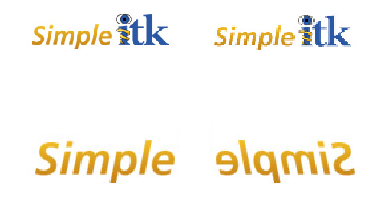

In [12]:
# 对logo进行步长为2的子采样
logo_subsampled = logo[::2,::2]

# Get the sub-image containing the word Simple
simple = logo[0:115,:]

# Get the sub-image containing the word Simple and flip it
simple_flipped = logo[115:0:-1,:]

#2行2列的图
n = 2

print(logo.GetSize())
print(logo_subsampled.GetSize())

plt.subplot(n,2,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off');

plt.subplot(n,2,2)
plt.imshow(sitk.GetArrayViewFromImage(logo_subsampled))
plt.axis('off');

plt.subplot(n,2,3)
plt.imshow(sitk.GetArrayViewFromImage(simple))
plt.axis('off')

plt.subplot(n,2,4)
plt.imshow(sitk.GetArrayViewFromImage(simple_flipped))
plt.axis('off');

在徽标图像上绘制一个正方形：运行此单元格后，取消注释“Version 3”并查看其效果。

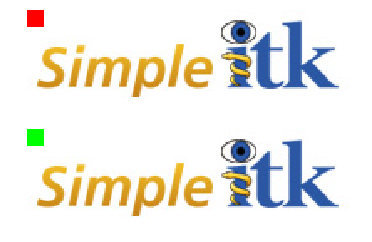

In [13]:
# Version 0: 获取numpy数组并通过广播分配值 - 稍后你需要从数组中构造一个新的图像
logo_pixels = sitk.GetArrayFromImage(logo)
logo_pixels[0:10,0:10] = [0,255,0]

# Version 1: 生成错误，图像切片返回新图像，您无法为图像指定值
#logo[0:10,0:10] = [255,0,0]

# Version 2: 图像切片会返回一个新图像，因此此处的所有作业都不会对原始的“logo”图像产生任何影响
logo_subimage = logo[0:10, 0:10]
for x in range(0,10):
    for y in range(0,10):
        logo_subimage[x,y] = [255,0,0]

# Version 3: 修改原始图像，迭代并为每个像素分配一个值
for x in range(0,10):
    for y in range(0,10):
        logo[x,y] = [255,0,0]

        
plt.subplot(2,1,1)
plt.imshow(sitk.GetArrayViewFromImage(logo))
plt.axis('off')

plt.subplot(2,1,2)
plt.imshow(logo_pixels)
plt.axis('off');

## Conversion between numpy and SimpleITK

SimpleITK和numpy索引访问顺序相反！

SimpleITK: image[x,y,z]<br>
numpy: image_numpy_array[z,y,x]

### From SimpleITK to numpy

我们有两种从SimpleITK转换为numpy的选项：
- GetArrayFromImage():返回图像数据的副本。 然后，您可以自由修改数据，因为它对原始SimpleITK图像没有影响。 
- GetArrayViewFromImage()：返回图像数据的视图，这对于以内存有效的方式显示非常有用。 如果删除原始SimpleITK图像，则无法修改数据，视图将无效。

In [14]:
nda = sitk.GetArrayFromImage(image_3D)
print(image_3D.GetSize())
print(nda.shape)

nda = sitk.GetArrayFromImage(image_RGB)
print(image_RGB.GetSize())
print(nda.shape)

(256, 128, 64)
(64, 128, 256)
(128, 64)
(64, 128, 3)


ValueError: assignment destination is read-only

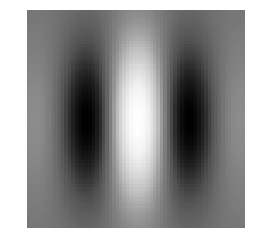

In [15]:
gabor_image = sitk.GaborSource(size=[64,64], frequency=.03)

# Getting a numpy array view on the image data doesn't copy the data
nda_view = sitk.GetArrayViewFromImage(gabor_image)
plt.imshow(nda_view, cmap=plt.cm.Greys_r)
plt.axis('off');

# Trying to assign a value to the array view will throw an exception
nda_view[0,0] = 255

### From numpy to SimpleITK

请记住设置图像的原点，间距和可能的方向余弦矩阵。 默认值可能与图像的物理尺寸不匹配。

In [ ]:
nda = np.zeros((10,20,3))

#if this is supposed to be a 3D gray scale image [x=3, y=20, z=10]
img = sitk.GetImageFromArray(nda)
print(img.GetSize())

#if this is supposed to be a 2D color image [x=20,y=10]
img = sitk.GetImageFromArray(nda, isVector=True)
print(img.GetSize())

### There and back again

下面的代码单元格说明了一种情况，即您的代码是SimpleITK方法和自定义Python代码的组合，可以使用强度值或SimpleITK之外的标签。 当您在Python中实现算法并且不关心物理间距时（这实际上假设volume是各向同性的），这是一种合理的方法。

In [ ]:
def my_algorithm(image_as_numpy_array):
    # res is the image result of your algorithm, has the same grid size as the original image
    res = image_as_numpy_array
    return res

# Starting with SimpleITK
img = sitk.ReadImage(fdata('training_001_mr_T1.mha'))

# Custom Python code working on a numpy array.
npa_res = my_algorithm(sitk.GetArrayFromImage(img))

# Converting back to SimpleITK (assumes we didn't move the image in space as we copy the information from the original)
res_img = sitk.GetImageFromArray(npa_res)
res_img.CopyInformation(img)

# Continuing to work with SimpleITK images
res_img - img

### Image operations

SimpleITK支持图像之间的基本算术运算，同时考虑到它们的物理空间。 反复运行此单元格。 

修复错误（注释掉SetDirection，然后注释SetSpacing）。 为什么SetOrigin行不会导致问题？ 为了被认为是等同的，需要两个物理属性有多接近？

In [ ]:
img1 = sitk.Image(24,24, sitk.sitkUInt8)
img1[0,0] = 0

img2 = sitk.Image(img1.GetSize(), sitk.sitkUInt8)
#img2.SetDirection([0,1,0.5,0.5])
#img2.SetSpacing([0.5,0.8])
img2.SetOrigin([0.000001,0.000001])
img2[0,0] = 255

img3 = img1 + img2
print(img3[0,0])

## Reading and Writing

SimpleITK可以读取和写入存储在单个文件或一组文件（例如DICOM序列）中的图像。

以DICOM格式存储的图像具有与之关联的元数据字典，其中填充有DICOM标记。当DICOM序列作为单个图像读取时，元数据信息不可用，因为DICOM标记特定于每个文件。如果需要元数据，则有三个选项：

1. 使用面向对象的接口的[ImageSeriesReader](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageSeriesReader.html)类，将其配置为使用`MetaDataDictionaryArrayUpdateOn`方法加载标记，如果需要私有标记，则可能加载`LoadPrivateTagsOn`方法。读取序列后，您可以使用`GetMetaDataKeys`，`HasMetaDataKey`和`GetMetaData`从序列阅读器访问元数据。

2. 使用面向对象的接口的[ImageFileReader](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1ImageFileReader.html)，设置特定切片的文件名，并仅使用`ReadImageInformation`方法读取它的元数据，该方法仅读取元数据而不读取批量像素信息。读取元数据后，您可以使用`GetMetaDataKeys`，`HasMetaDataKey`和`GetMetaData`从文件阅读器访问元数据。

3. 使用面向对象的接口的[ImageFileReader]()，设置特定切片的文件名并读取它。或者使用程序界面的ReadImage函数，读取特定文件。然后，您可以使用`GetMetaDataKeys`，`HasMetaDataKey`和`GetMetaData`直接从[Image](https://itk.org/SimpleITKDoxygen/html/classitk_1_1simple_1_1Image.html)访问元数据。


在下面的单元格中，我们读取JPEG格式图像，并将其写为PNG和BMP。文件格式是从文件扩展名中推断出来的。还设置了适当的像素类型 - 您可以覆盖它并强制选择的像素类型。

In [ ]:
img = sitk.ReadImage(fdata('SimpleITK.jpg'))
print(img.GetPixelIDTypeAsString())

# write as PNG and BMP
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.png'))
sitk.WriteImage(img, os.path.join(OUTPUT_DIR, 'SimpleITK.bmp'))

Read an image in JPEG format and cast the pixel type according to user selection.

In [ ]:
# Several pixel types, some make sense in this case (vector types) and some are just show
# that the user's choice will force the pixel type even when it doesn't make sense
# (e.g. sitkVectorUInt16 or sitkUInt8).
pixel_types = { 'sitkUInt8': sitk.sitkUInt8,
                'sitkUInt16' : sitk.sitkUInt16,
                'sitkFloat64' : sitk.sitkFloat64,
                'sitkVectorUInt8' : sitk.sitkVectorUInt8,#读取jpg图像的3个通道
                'sitkVectorUInt16' : sitk.sitkVectorUInt16,
                'sitkVectorFloat64' : sitk.sitkVectorFloat64}

def pixel_type_dropdown_callback(pixel_type, pixel_types_dict):
    #specify the file location and the pixel type we want
    img = sitk.ReadImage(fdata('SimpleITK.jpg'), pixel_types_dict[pixel_type])
    
    print(img.GetPixelIDTypeAsString())
    print(img[0,0])
    plt.imshow(sitk.GetArrayViewFromImage(img))
    plt.axis('off')
 
interact(pixel_type_dropdown_callback, pixel_type=list(pixel_types.keys()), pixel_types_dict=fixed(pixel_types));     

### 读DICOM序列并将其写入1个mha文件
1. 指定序列所在目录:origin_dir
2. 设定特定的序列ID:series_ID
3. 初始化图像序列阅读器:reader=sitk.ImageSeriesReader()
4. GetGDCMSeriesFileNames(origin_dir,series_ID):根据序列目录和序列ID获取其对应的文件名(全路径)元组:origin_filenames
5. sitk.ReadImage(origin_filenames):根据文件名元组读取3D图像:origin_image
6. sitk.WriteImage(origin_image,dst):将图像以mha格式写入dst_dir/xxx.mha文件中

In [ ]:
#序列所在目录
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))

#设定特定的序列ID
series_ID = '1.2.840.113619.2.290.3.3233817346.783.1399004564.515'

#图像序列阅读器
reader = sitk.ImageSeriesReader()

#GetGDCMSeriesFileNames:根据序列目录和序列ID获取其对应的文件名(全路径)元组
origin_filenames=reader.GetGDCMSeriesFileNames(data_directory, series_ID)
#print(type(origin_filenames))

#sitk.ReadImage:根据文件名元组读取3D图像
original_image = sitk.ReadImage(origin_filenames)
#print(original_image)

# sitk.WriteImage(origin_image,dst):将图像以mha格式写入dst_dir/xxx.mha文件中
output_file_name_3D = os.path.join(OUTPUT_DIR, '3DImage.mha')
sitk.WriteImage(original_image, output_file_name_3D)

# Read it back again.
written_image = sitk.ReadImage(output_file_name_3D)

# Check that the original and written image are the same.
statistics_image_filter = sitk.StatisticsImageFilter()
statistics_image_filter.Execute(original_image - written_image)

# Check that the original and written files are the same
print('Max, Min differences are : {0}, {1}'.format(statistics_image_filter.GetMaximum(), statistics_image_filter.GetMinimum()))

将图像系列写为JPEG。 **WriteImage函数接收3D volume和图像文件名列表，会根据z轴(depth)写入volume。** 对于可显示的结果，我们需要重新缩放图像强度(dicom文件的图像强度即像素值)，因为JPEG格式需要转换为UInt8像素类型（默认为[0,255]）。

- WriteImage(image_3D,list_of_filenames)

## StatisticsImageFilter计算图像的最小值，最大值，总和，均值，方差，标准差。

1. statistics_image_filter = sitk.StatisticsImageFilter()
2. statistics_image_filter.Execute(image)
3. statistics_image_filter.GetMaximum(),statistics_image_filter.GetMinimum()....

In [ ]:
#print(written_image.intensity)
statistics_image_filter = sitk.StatisticsImageFilter()

#原mha图像的数据类型
print(written_image.GetPixelIDTypeAsString())
statistics_image_filter.Execute(written_image)

#mha图像的最大intensity和最小intensity
print("max:{},min:{}".format(statistics_image_filter.GetMaximum(),statistics_image_filter.GetMinimum()))

#转换图像的数据类型为sitk.sitkUInt8为了将slide保存为jpg格式
slides_uint=sitk.Cast(sitk.RescaleIntensity(written_image), sitk.sitkUInt8)
print(type(slides_uint))
print(slides_uints.GetPixelIDTypeAsString())

sitk.WriteImage(slides_uint, sitk.sitkUInt8), 
               [os.path.join(OUTPUT_DIR, 'slice{0:03d}.jpg'.format(i)) for i in range(written_image.GetSize()[2])]) 

### 从目录中选择特定的DICOM系列，然后加载用户选择。
1. 指定序列所在目录:origin_dir
2. 初始化图像序列阅读器reader = sitk.ImageSeriesReader()
3. reader.GetGDCMSeriesIDs(origin_dir)根据目录读取序列ID元组(1个目录下可能存在多个序列):series_IDs
4. 检查至少存在1个序列ID:series_ID
5. reader.GetGDCMSeriesFileNames(origin_dir, series)根据目录和指定的某个序列ID获取其对应文件名元组:origin_filenames
6. reader.SetFileNames(origin_filenames)设置origin_filenames为reader要读取的文件名元组
7. reader.Execute():读取序列图像:img

In [ ]:
data_directory = os.path.dirname(fdata("CIRS057A_MR_CT_DICOM/readme.txt"))
# Global variable 'selected_series' is updated by the interact function

selected_series = ''

#图片文件(1个slide)读取器
file_reader = sitk.ImageFileReader()

def DICOM_series_dropdown_callback(series_to_load, series_dictionary):
    global selected_series
    
    # Print some information about the series from the meta-data dictionary
    # DICOM standard part 6, Data Dictionary: http://medical.nema.org/medical/dicom/current/output/pdf/part06.pdf
    
    #读某个序列对应的第1个文件
    file_reader.SetFileName(series_dictionary[series_to_load][0])
    
    #读取该slide的信息
    file_reader.ReadImageInformation()
    tags_to_print = {'0010|0010': 'Patient name: ', 
                     '0008|0060' : 'Modality: ',
                     '0008|0021' : 'Series date: ',
                     '0008|0080' : 'Institution name: ',
                     '0008|1050' : 'Performing physician\'s name: '}
    for tag in tags_to_print:
        try:
            print(tags_to_print[tag] + file_reader.GetMetaData(tag))
        except: # Ignore if the tag isn't in the dictionary
            pass
    
    #交互式选中的序列ID
    selected_series = series_to_load                    

# 目录包含多个DICOM研究/序列，存储在字典中，其中键是序列ID，值是其对应的文件名
reader = sitk.ImageSeriesReader()
series_file_names = {}

#GetGDCMSeriesIDs：根据目录读取序列ID元组(1个目录下可能存在多个序列)
series_IDs = reader.GetGDCMSeriesIDs(data_directory)
#print(series_IDs)

# 检查至少有一个序列ID
if series_IDs:
    for series in series_IDs:
        #GetGDCMSeriesFileNames:根据目录和序列号获取其对应文件名元组
        series_file_names[series] = reader.GetGDCMSeriesFileNames(data_directory, series)
    
    interact(DICOM_series_dropdown_callback, series_to_load=list(series_IDs), series_dictionary=fixed(series_file_names)); 
else:
    print('Data directory does not contain any DICOM series.')

In [ ]:
reader.SetFileNames(series_file_names[selected_series])
img = reader.Execute()

# Display the image slice from the middle of the stack, z axis
z = int(img.GetDepth()/2)
plt.imshow(sitk.GetArrayViewFromImage(img)[z,:,:], cmap=plt.cm.Greys_r)
plt.axis('off');

### Multi-channel images and color

一般而言，SimpleITK将彩色图像表示为独立于[色彩空间](https://en.wikipedia.org/wiki/Color_space)的多通道图像。在使用它们进行显示或任何其他目的之前，您可以根据其他颜色空间知识正确解释通道。

以下单元格说明了以DICOM格式读取和解释有趣图像。这是一张灯箱上的X射线照片（是的，野外有一些奇怪的东西）。该图像的元数据字典包含允许我们智能地解释它的相关信息。

我们将看一下图像的模态（0008 | 0060），在我们的例子中是XC，它代表“外部相机摄影”。在阅读图像后，我们看到它有三个通道并尝试显示它。此时我们意识到出了问题，我们检查了图像的光度学解释（0028 | 0004），DICOM中的色彩空间说话。然后我们修改像素值，以便我们可以使用图像查看器的预期颜色空间显示它们。

In [4]:
xray_photo = sitk.ReadImage(fdata('photo.dcm'))

#X光图像的size:[W,H,1]
print(xray_photo.GetSize())
print(sitk.GetArrayFromImage(xray_photo).shape)
print('Image Modality: {0}'.format(xray_photo.GetMetaData('0008|0060')))

#通道数:3
print('Number of channels: {0}'.format(xray_photo.GetNumberOfComponentsPerPixel()))

# Display the image using Fiji which expects the channels to be in the RGB color space
#sitk.Show(xray_photo)

# In what color space are the pixels?:YBR_FULL_422
print('Photomertic Interpretation: {0}'.format(xray_photo.GetMetaData('0028|0004')))

Fetching photo.dcm
(371, 357, 1)
(1, 357, 371, 3)
Image Modality: XC
Number of channels: 3
Photomertic Interpretation: YBR_FULL_422


In [ ]:
# x-rays are expected to be a single channel gray scale image and not a color image. To obtain a gray scale image
# corresponding to the original three channel image we only need to take the luminance (Y channel).

#获取灰度图只需要第1个通道
sitk.Show(sitk.VectorIndexSelectionCast(xray_photo,0))

In [ ]:
# 我们的像素在YCbCr颜色空间中，我们希望它们是RGB，因此我们需要更改表示
def full_ycbcr_to_rgb(image):
    #sitk.VectorIndexSelectionCast(image,i, sitk.sitkFloat32):获取第i channel的矩阵数据并转换为sitk.sitkFloat32类型
    channels = [sitk.VectorIndexSelectionCast(image,i, sitk.sitkFloat32) for i in range(image.GetNumberOfComponentsPerPixel())]
    
    chan0 = channels[0]
    chan1 = channels[1] - 128
    chan2 = channels[2] - 128
    
    return sitk.Compose([sitk.Clamp(chan0 + 1.402*chan2, sitk.sitkUInt8),
                         sitk.Clamp(chan0 - 0.114 * 1.772 / 0.587*chan1 - 0.299 * 1.402 / 0.587*chan2, sitk.sitkUInt8),
                         sitk.Clamp(chan0 + 1.772*chan1, sitk.sitkUInt8)])

#获取RGB图需要颜色空间转换
sitk.Show(full_ycbcr_to_rgb(xray_photo))

### Finer control(更精细的控制)

ImageFileReader的接口提供更精细的读取控制，允许我们要求使用特定的IO，并允许我们将图像的一部分流式传输到内存而无需读取整个图像（由ImageIO组件的子集支持）。 

#### Selecting a Specific Image IO

SimpleITK依赖于已注册的ImageIO来指示它们是否可以读取文件然后执行读取。 这是自动完成的，遍历ImageIO集并询问他们是否可以读取给定文件。 可以选择第一个。 如果多个ImageIO可以读取特定格式，我们不知道哪个用于任务（例如TIFFImageIO和LSMImageIO，它是从它派生的，都可以读取tif文件）。 在某些情况下，您可能希望使用特定的IO，可能更快地读取文件，或支持与文件格式关联的更完整的功能集。 

下一个单元格显示如何找出注册的ImageIOs,并指定我们想要的那个。

1. sitk.ImageFileReader()初始化图像文件读取器file_reader
2. file_reader.SetImageIO('')设置默认的IO,自动选择
3. file_reader.SetFileName(fdata('SimpleITK.jpg'))设置读取的文件名
4. file_reader.Execute()执行读取器,返回image

In [17]:
file_reader = sitk.ImageFileReader()

# Get a tuple listing all registered ImageIOs
image_ios_tuple = file_reader.GetRegisteredImageIOs()
print("The supported image IOs are: " + str(image_ios_tuple))

# Optionally, just print the reader and see which ImageIOs are registered
print('\n',file_reader)

#Specify the JPEGImageIO and read file
file_reader.SetImageIO('JPEGImageIO')
file_reader.SetFileName(fdata('SimpleITK.jpg'))
logo = file_reader.Execute()

# Unfortunately, now reading a non JPEG image will fail
# try:
#     file_reader.SetFileName(fdata('cthead1.png'))
#     ct_head = file_reader.Execute()
# except RuntimeError:
#     print('Got a RuntimeError exception.')
    
# We can reset the file reader to its default behaviour so that it automatically 
# selects the ImageIO
file_reader.SetImageIO('')
ct_head = file_reader.Execute()

The supported image IOs are: ('BMPImageIO', 'BioRadImageIO', 'Bruker2dseqImageIO', 'GDCMImageIO', 'GE4ImageIO', 'GE5ImageIO', 'GiplImageIO', 'HDF5ImageIO', 'JPEGImageIO', 'LSMImageIO', 'MINCImageIO', 'MRCImageIO', 'MetaImageIO', 'NiftiImageIO', 'NrrdImageIO', 'PNGImageIO', 'StimulateImageIO', 'TIFFImageIO', 'VTKImageIO')

 itk::simple::ImageFileReader
  FileName: ""
  ExtractSize: [ ]
  ExtractIndex: [ ]
  Image Information:
    PixelType: Unknown pixel id
    Dimension: 0
    NumberOfComponents: 0
    Direction: [ ]
    Origin: [ ]
    Spacing: [ ]
    Size: [ ]
  OutputPixelType: Unknown pixel id
  LoadPrivateTags: 0
  ImageIOName: 
  Registered ImageIO:
	BMPImageIO ( *.bmp, *.BMP, )
	BioRadImageIO ( *.PIC, *.pic, )
	Bruker2dseqImageIO
	GDCMImageIO ( *.dcm, *.DCM, *.dicom, *.DICOM, )
	GE4ImageIO
	GE5ImageIO
	GiplImageIO
	HDF5ImageIO
	JPEGImageIO ( *.jpg, *.JPG, *.jpeg, *.JPEG, )
	LSMImageIO ( *.tif, *.TIF, *.tiff, *.TIFF, *.lsm, *.LSM, )
	MINCImageIO ( *.mnc, *.MNC, )
	MRCImage

#### Streaming Image IO

**流式图像IO SimpleITK支持的一些ImageIO允许您在图像的子区域中流式传输，而无需将整个图像读入内存。 当您受到内存限制时（图像很大或内存有限），这非常有用**

支持流式传输的ImageIO包括HDF5ImageIO，VTKImageIO，NiftiImageIO，MetaImageIO ......

下一个单元格显示如何从较大的图像中读取子/裁剪图像。 我们读取原始图像的图像[1 / 3,2 / 3]的中央1/3部分。

In [4]:
file_reader = sitk.ImageFileReader()
file_reader.SetFileName(fdata('vm_head_rgb.mha'))

file_reader.ReadImageInformation()
image_size = file_reader.GetSize()
print("image_size:{}".format(image_size))

#从width,height,depth 1/3的索引位置裁剪1/3
start_index, extract_size = zip(*[(int(1.0/3.0*sz), int(1.0/3.0*sz)) for sz in file_reader.GetSize()])

print("start_index:{}".format(start_index))
print("extract_size:{}".format(extract_size))

file_reader.SetExtractIndex(start_index)
file_reader.SetExtractSize(extract_size)

#sitk.Show(file_reader.Execute())

Fetching vm_head_rgb.mha
image_size:(2048, 1216, 220)
start_index:(682, 405, 73)
extract_size:(682, 405, 73)


接下来的单元显示了如何使用比直接方法更小的内存占用减去彼此的两个大图像，尽管代码比直接方法更复杂和更慢：

```
sitk.ReadImage(image1_file_name) - sitk.ReadImage(image2_file_name)
```

**Note**: 代码假设两个图像占据相同的空间区域（原点，间距，方向余弦矩阵）



In [8]:
help(sitk.Paste)

Help on function Paste in module SimpleITK.SimpleITK:

Paste(*args, **kwargs)
    Paste(Image destinationImage, Image sourceImage, VectorUInt32 sourceSize, VectorInt32 sourceIndex, VectorInt32 destinationIndex) -> Image
    
    
    
    Paste an image into another image.
    
    
    This function directly calls the execute method of PasteImageFilter in order to support a procedural API
    
    
    See:
     itk::simple::PasteImageFilter for the object oriented interface



In [3]:
def streaming_subtract(image1_file_name, image2_file_name, parts):
    '''
    Subtract image1 from image2 using 'parts' number of sub-regions.
    从image2中减去子区域(深度上)image1
    '''
    
    #读取image1_file_name的size
    file_reader = sitk.ImageFileReader()
    file_reader.SetFileName(image1_file_name)
    file_reader.ReadImageInformation()
    image_size = file_reader.GetSize()

    # 初始化result_img size同image1，每个位置通道数同image1
    result_img = sitk.Image(file_reader.GetSize(), file_reader.GetPixelID(), file_reader.GetNumberOfComponents())
    result_img.SetSpacing(file_reader.GetSpacing())
    result_img.SetOrigin(file_reader.GetOrigin())
    result_img.SetDirection(file_reader.GetDirection())

    extract_size = list(file_reader.GetSize())
    extract_size[-1] = extract_size[-1]//parts
    current_index = [0]*file_reader.GetDimension()
    
    for i in range(parts):
        if i == (parts-1): # last region may be smaller than the standard extract region
            extract_size[-1] = image_size[-1] - current_index[-1]
        
        file_reader.SetFileName(image1_file_name)
        
        #file_reader.SetExtractSize设置子区域的索引位置
        #file_reader.SetExtractSize设置子区域的size
        #file_reader.Execute读取子区域sub_image1
        file_reader.SetExtractIndex(current_index)
        file_reader.SetExtractSize(extract_size)
        sub_image1 = file_reader.Execute()

        file_reader.SetFileName(image2_file_name)
        file_reader.SetExtractIndex(current_index)
        file_reader.SetExtractSize(extract_size)
        sub_image2 = file_reader.Execute()
        
        
        # Paste the result of subtracting the two subregions into their location in the result_img
        #从sub_image1 - sub_image2索引为[0]*file_reader.GetDimension()的位置拷贝extract_size尺寸的区域给result_image索引为current_index位置
        result_img = sitk.Paste(result_img, sub_image1 - sub_image2, extract_size, [0]*file_reader.GetDimension(), current_index)
        
        #更新下一个子区域索引位置的depth
        current_index[-1] += extract_size[-1]        
    return result_img

# If you have the patience and RAM you can try this with the vm_head_rgb.mha image.
image1_file_name = fdata('fib_sem_bacillus_subtilis.mha')
image2_file_name = fdata('fib_sem_bacillus_subtilis.mha')

Fetching fib_sem_bacillus_subtilis.mha
Downloaded 74215399 of 74215399 bytes (100.00%)
Fetching fib_sem_bacillus_subtilis.mha


查看系统内存使用情况的一种简单方法是打开相应的监控程序：（Windows）资源监视器; （Linux）顶部; （OS X）活动监视器。 这将让您大致了解流式传输与非流式传输方法所使用的内存。

In [7]:
result_img = streaming_subtract(image1_file_name, image2_file_name, parts=5)
print(result_img.GetSize())
print(result_img.GetNumberOfComponentsPerPixel())

(746, 418, 238)
1


In [ ]:
result_img = sitk.ReadImage(image1_file_name) - sitk.ReadImage(image2_file_name)
del result_img